In [21]:
#funciones

def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [23]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
#import a_funciones as fn
import matplotlib.pyplot as plt


In [52]:
## crear copia de db_books datos originales, nombrarla books2 y procesar books2

conn=sql.connect('db_movies') ### crear cuando no existe el nombre de cd  y para conectarse cuando sí existe.
cur=conn.cursor() ###para funciones que ejecutan sql en base de datos


In [7]:
### para verificar las tablas que hay disponibles
cur.execute("SELECT name FROM sqlite_master where type='table' ")
cur.fetchall()

[('ratings',), ('movies',)]

In [9]:
#### para consultar datos ######## con cur

cur.execute("select * from movies")
cur.fetchall()

[(1, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy'),
 (2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'),
 (3, 'Grumpier Old Men (1995)', 'Comedy|Romance'),
 (4, 'Waiting to Exhale (1995)', 'Comedy|Drama|Romance'),
 (5, 'Father of the Bride Part II (1995)', 'Comedy'),
 (6, 'Heat (1995)', 'Action|Crime|Thriller'),
 (7, 'Sabrina (1995)', 'Comedy|Romance'),
 (8, 'Tom and Huck (1995)', 'Adventure|Children'),
 (9, 'Sudden Death (1995)', 'Action'),
 (10, 'GoldenEye (1995)', 'Action|Adventure|Thriller'),
 (11, 'American President, The (1995)', 'Comedy|Drama|Romance'),
 (12, 'Dracula: Dead and Loving It (1995)', 'Comedy|Horror'),
 (13, 'Balto (1995)', 'Adventure|Animation|Children'),
 (14, 'Nixon (1995)', 'Drama'),
 (15, 'Cutthroat Island (1995)', 'Action|Adventure|Romance'),
 (16, 'Casino (1995)', 'Crime|Drama'),
 (17, 'Sense and Sensibility (1995)', 'Drama|Romance'),
 (18, 'Four Rooms (1995)', 'Comedy'),
 (19, 'Ace Ventura: When Nature Calls (1995)', 'Comedy'),
 (20, 'Mo

In [10]:
#### para consultar datos ######## con cur

cur.execute("select * from ratings")
cur.fetchall()

[(1, 1, 4.0, 964982703),
 (1, 3, 4.0, 964981247),
 (1, 6, 4.0, 964982224),
 (1, 47, 5.0, 964983815),
 (1, 50, 5.0, 964982931),
 (1, 70, 3.0, 964982400),
 (1, 101, 5.0, 964980868),
 (1, 110, 4.0, 964982176),
 (1, 151, 5.0, 964984041),
 (1, 157, 5.0, 964984100),
 (1, 163, 5.0, 964983650),
 (1, 216, 5.0, 964981208),
 (1, 223, 3.0, 964980985),
 (1, 231, 5.0, 964981179),
 (1, 235, 4.0, 964980908),
 (1, 260, 5.0, 964981680),
 (1, 296, 3.0, 964982967),
 (1, 316, 3.0, 964982310),
 (1, 333, 5.0, 964981179),
 (1, 349, 4.0, 964982563),
 (1, 356, 4.0, 964980962),
 (1, 362, 5.0, 964982588),
 (1, 367, 4.0, 964981710),
 (1, 423, 3.0, 964982363),
 (1, 441, 4.0, 964980868),
 (1, 457, 5.0, 964981909),
 (1, 480, 4.0, 964982346),
 (1, 500, 3.0, 964981208),
 (1, 527, 5.0, 964984002),
 (1, 543, 4.0, 964981179),
 (1, 552, 4.0, 964982653),
 (1, 553, 5.0, 964984153),
 (1, 590, 4.0, 964982546),
 (1, 592, 4.0, 964982271),
 (1, 593, 4.0, 964983793),
 (1, 596, 5.0, 964982838),
 (1, 608, 5.0, 964982931),
 (1, 648, 

In [11]:
##### consultar trayendo para pandas ###
df_movies=pd.read_sql("select * from movies", conn)
df_ratings=pd.read_sql("select * from ratings", conn)


In [15]:
#### para llevar de pandas a BD
df_movies.to_sql("movies", conn, if_exists='replace')
df_ratings.to_sql("ratings", conn, if_exists='replace')
###conn.close()para cerrar conexión


100836

In [24]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [25]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [30]:
#####Exploración inicial #####

##### Descripción base de ratings

###calcular la distribución de calificaciones
cr=pd.read_sql(""" select 
                          "rating" as rating, 
                          count(*) as conteo 
                          from ratings
                          group by "rating"
                          order by conteo desc""", conn)
###Nombres de columnas con numeros o guiones se deben poner en doble comilla para que se reconozcan

pd.read_sql("select count(*) from ratings", conn)

data  = go.Bar( x=cr.rating,y=cr.conteo, text=cr.conteo, textposition="outside")
Layout=go.Layout(title="Count of ratings",xaxis={'title':'Rating'},yaxis={'title':'Count'})
go.Figure(data,Layout)
### los que están en 0 fueron películas vistas pero no calificadas
#### Se conoce como calificación implicita, consume producto pero no da una calificacion

In [44]:
### calcular cada usuario cuantas películas calificó
rating_users=pd.read_sql(''' select "userId" as user_id,
                         count(*) as cnt_rat
                         from ratings
                         group by "userId"
                         order by cnt_rat asc
                         ''',conn )



rating_users.describe()
### la mayoria de usarios tiene pocas peliculas calificadas.

,user_id,cnt_rat
count,610.000000,610.000000
mean,305.500000,165.304918
std,176.236111,269.480584
min,1.000000,20.000000
25%,153.250000,35.000000
50%,305.500000,70.500000
75%,457.750000,168.000000
max,610.000000,2698.000000


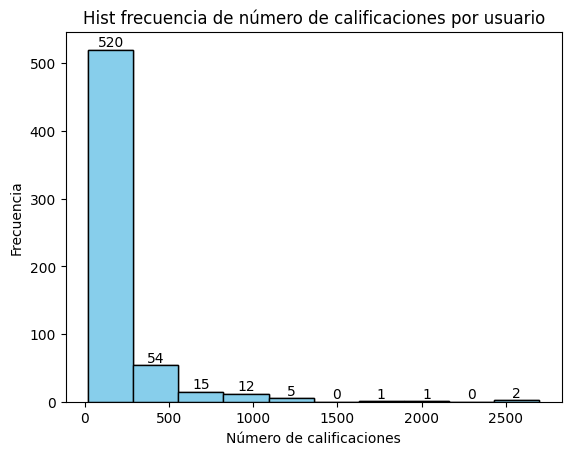

In [46]:

# Crear el histograma
plt.hist(rating_users['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Hist frecuencia de número de calificaciones por usuario')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

# Obtener los valores del histograma (cuentas y bordes de los bins)
counts, bins, patches = plt.hist(rating_users['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir los números de conteo en cada barra
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [37]:
#### excluir usuarios con menos de 50 películas calificadas (para tener calificaion confiable) y los que tienen mas de mil porque pueden ser no razonables

rating_users2=pd.read_sql(''' select "userId" as user_id,
                         count(*) as cnt_rat
                         from ratings
                         group by "userId"
                         having cnt_rat >=50 and cnt_rat <=1000
                         order by cnt_rat asc
                         ''',conn )

### ver distribucion despues de filtros,ahora se ve mas razonables
rating_users2.describe()




,user_id,cnt_rat
count,373.000000,373.000000
mean,301.766756,201.863271
std,178.462796,187.219913
min,1.000000,50.000000
25%,141.000000,77.000000
50%,305.000000,129.000000
75%,455.000000,248.000000
max,608.000000,977.000000


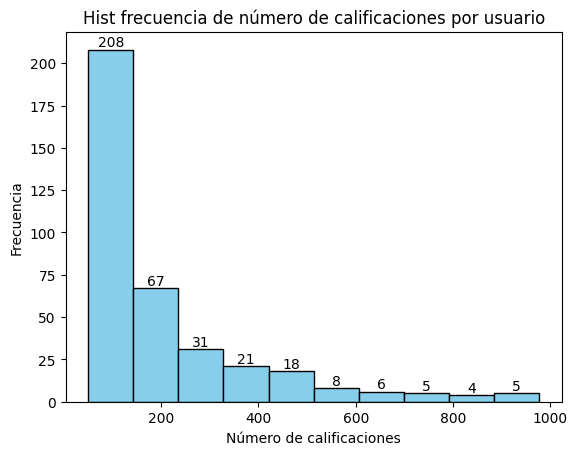

In [47]:
# Crear el histograma para los datos filtrados
counts, bins, patches = plt.hist(rating_users2['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Hist frecuencia de número de calificaciones por usuario')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

# Añadir los números de conteo en cada barra
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [36]:
#### verificar cuantas calificaciones tiene cada película
rating_movies=pd.read_sql(''' select movieId ,
                         count(*) as cnt_rat
                         from ratings
                         group by "MovieId"
                         order by cnt_rat desc
                         ''',conn )

### analizar distribucion de calificaciones por película
rating_movies.describe()


,movieId,cnt_rat
count,9724.000000,9724.000000
mean,42245.024373,10.369807
std,52191.137320,22.401005
min,1.000000,1.000000
25%,3245.500000,1.000000
50%,7300.000000,3.000000
75%,76739.250000,9.000000
max,193609.000000,329.000000


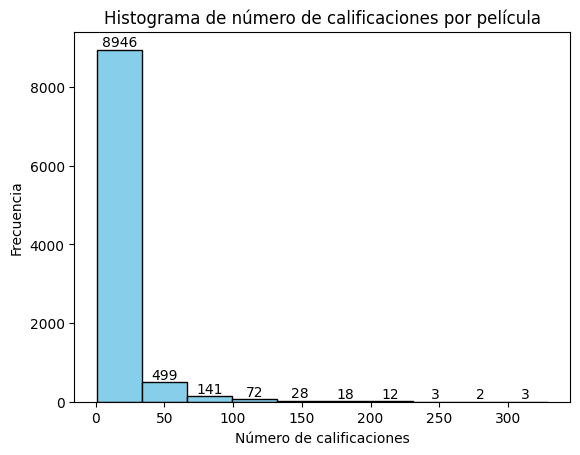

In [50]:
# Crear el histograma
counts, bins, patches = plt.hist(rating_movies['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de número de calificaciones por película')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

# Añadir los números de conteo en cada barra
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


             movieId     cnt_rat
count     450.000000  450.000000
mean    11245.017778   91.911111
std     23457.084170   46.098385
min         1.000000   50.000000
25%       757.000000   59.000000
50%      2020.000000   76.000000
75%      4994.500000  107.750000
max    122904.000000  329.000000


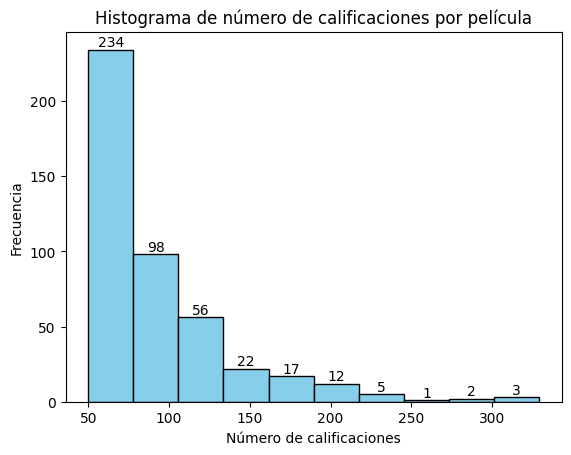

In [49]:
import matplotlib.pyplot as plt

# Consulta para excluir películas con menos de 50 calificaciones
rating_movies2 = pd.read_sql('''
    SELECT MovieId, COUNT(*) AS cnt_rat
    FROM ratings
    GROUP BY "MovieId"
    HAVING COUNT(*) >= 50
    ORDER BY cnt_rat DESC
''', conn)

# Mostrar las estadísticas descriptivas
print(rating_movies2.describe())

# Crear el histograma
counts, bins, patches = plt.hist(rating_movies2['cnt_rat'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de número de calificaciones por película')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')

# Añadir los números de conteo en cada barra
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [51]:
###########
fn.ejecutar_sql('preprocesamientos.sql', cur)

cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()


NameError: name 'fn' is not defined